# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> &#9989; Andres Salazar.</p>
### <p style="text-align: right;"> &#9989; Andrew00-jpg.</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import random

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [5]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
   'South America': {
        'Venezuela': ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Ural', 'Afghanistan', 'Middle East'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Southern Europe', 'Western Europe'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Southern Europe': ['Western Europe', 'Northern Europe', 'Ukraine', 'Middle East', 'Egypt', 'North Africa']
    },
    'Africa': {
        'North Africa': ['Brazil', 'Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo'],
        'Egypt': ['Southern Europe', 'North Africa', 'East Africa', 'Middle East'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Madagascar', 'Middle East'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Kamchatka', 'Irkutsk'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Kamchatka', 'Mongolia'],
        'Kamchatka': ['Yakutsk', 'Irkutsk', 'Mongolia', 'Japan', 'Alaska'],
        'Mongolia': ['Siberia', 'Irkutsk', 'Kamchatka', 'Japan', 'China'],
        'Japan': ['Mongolia', 'Kamchatka'],
        'Afghanistan': ['Ukraine', 'Ural', 'China', 'India', 'Middle East'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'Afghanistan', 'India', 'Siam'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Afghanistan', 'India', 'East Africa', 'Egypt'],
        'India': ['Middle East', 'Afghanistan', 'China', 'Siam'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['New Guinea', 'Western Australia']
    }
}



### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [10]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here
    G = nx.Graph()
    
    # Iterate over each continent and its territories
    for continent, continent_territories in territories.items():
        for territory, neighbors in continent_territories.items():
            # Add the territory node with a continent attribute
            G.add_node(territory, continent=continent)
            
            # Add edges to connect the territory with its neighbors
            for neighbor in neighbors:
                G.add_edge(territory, neighbor)
    
    return G

# Create the graph
G = create_risk_graph(risk_territories)

print("Number of nodes (territories):", G.number_of_nodes())
print("Number of edges (connections):", G.number_of_edges())

Number of nodes (territories): 42
Number of edges (connections): 83


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Choose a layout from the following options:
1. spring
2. circular
3. shell
4. kamada_kawai
5. spectral


Enter your choice (1-5):  4


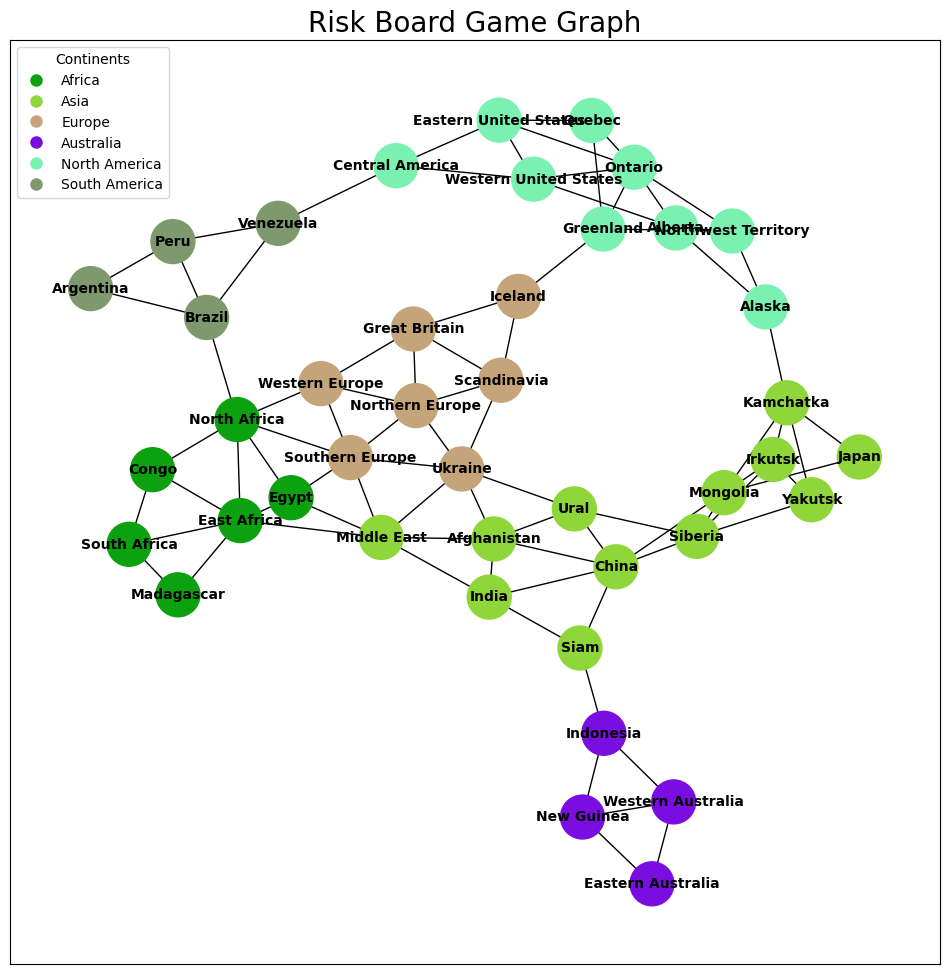

In [20]:
def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Your code here
     # List of available layouts
    layouts = {
        "spring": nx.spring_layout,
        "circular": nx.circular_layout,
        "shell": nx.shell_layout,
        "kamada_kawai": nx.kamada_kawai_layout,
        "spectral": nx.spectral_layout
    }

    # Prompt user to choose a layout
    print("Choose a layout from the following options:")
    for i, layout_name in enumerate(layouts.keys()):
        print(f"{i+1}. {layout_name}")
    choice = int(input("Enter your choice (1-5): ")) - 1
    layout_func = list(layouts.values())[choice]

    # Generate the layout
    pos = layout_func(G)

    # Generate a unique color for each continent
    continents = set(nx.get_node_attributes(G, 'continent').values())
    continent_colors = {continent: (random.random(), random.random(), random.random()) for continent in continents}

    # Assign colors to nodes based on continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes]

    plt.figure(figsize=(12, 12))
    plt.title("Risk Board Game Graph", fontsize=20)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Draw labels on nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

    # Create a legend for each continent
    legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                                markerfacecolor=color, markersize=10) 
                     for continent, color in continent_colors.items()]
    plt.legend(handles=legend_labels, title="Continents", loc="upper left")

    plt.show()

    pass

# Visualize the graph
visualize_risk_graph(G)


&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

✎ 1.The spring layout provides the best visualization of continent-based clustering in the Risk board graph. This layout uses a force-directed algorithm that positions nodes in such a way that connected nodes are closer together while minimizing edge crossings. This naturally groups territories that are geographically connected, making it visually intuitive and clear to distinguish continents from one another.The reason behind choosing the spring layout is that it effectively clusters interconnected nodes and minimizes overlap between edges. The layout models the graph as a system of forces where nodes connected by edges act like springs, pulling each other closer, while non-connected nodes repel each other. This results in a visually appealing and organized representation that highlights clusters of interconnected nodes.
2. The Kamada-Kawai layout is a force-directed graph layout algorithm that minimizes the energy of the graph by calculating ideal distances between nodes. The algorithm positions nodes so that the actual distance between them closely matches the ideal distance, based on a spring-force model. It is particularly useful for visualizing graphs where node distances are significant. According to the original paper by Kamada and Kawai (1989), this layout aims to reduce energy by maintaining equilibrium between attractive and repulsive forces between nodes, thereby generating an aesthetically pleasing graph.
3. The part of the code that assigns colors to nodes based on their continent involves generating a random color for each continent and mapping those colors to the nodes. The code extracts all unique continent values from the graph and then creates a dictionary mapping each continent to a random RGB color. It then generates a list of colors for the nodes based on their continent attribute.
4. The legend is created by using the plt.Line2D function to manually construct legend entries. Each legend entry is styled to resemble a colored circular marker, representing each continent. The plt.legend function then uses these markers as handles to display a legend with the title “Continents”.
5. Instead of using a pre-defined colormap, I chose to generate random RGB values for each continent. This ensures that each continent is distinctly colored and easily recognizable. This method provides unique and vibrant colors without being limited to predefined colormaps.
6. The node size and font size in the visualization were configured directly using NetworkX drawing functions. The node_size=1000 parameter controls the size of each node, while font_size=10 sets the size of the node labels.
7. The node labels are printed using the nx.draw_networkx_labels function, which takes the graph G, the position dictionary pos, and font styling parameters. The function places the labels at the calculated positions using the layout chosen earlier. The use of font_color="black" and font_weight="bold" ensures that the labels stand out clearly against the colored nodes.
    

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [21]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University